# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

### Business Objectives

Used car dealerships need to sell as many cars as possible in the shortest amount of time and, at the same time, try and make the most profit out of each and every sale.  In order to achieve this overall objective it beehoves the used car dealership to understand which characteristics of used cars heavily influence their sales price so that the dealership can stock it's inventory with used cars containing such features, hence which will sell fast and make the most marginal profit for the dealership.  This understanding will help the dealership accurately price their inventory to acheive the previously stated objective.

###Data Mining Goal

A dataset of 426K past vehicle sales will be used for data preperation, data exploratory analysis, feature selection and model building \(model training and validation\) to build a regression model with the appropriate features and coeficients/weights that can be used by the dealership to accurately price used cars for optimizing sales.

After the initial data munging, cleaning and encoding of categorical features/columns is performed on the original dataset, the resulting data will be used to train and test different models, pick the optimal the set of features/columns in the optimal order using grid search and cross validate the various models against each other to determine those with highest accuracy.





### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, ARDRegression, BayesianRidge
from sklearn.impute import KNNImputer
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn import preprocessing
import io

In [2]:
#import data
sales_df = pd.read_csv('data/vehicles.csv')

In [3]:
# See first 5 rows
sales_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
sales_df.shape


(426880, 18)

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
columns = pd.DataFrame(list(sales_df.columns.values[1:]))
#columns

data_types = pd.DataFrame(sales_df.dtypes, columns=['Data Type'])
#data_types

data_count = pd.DataFrame(sales_df.count(), columns=['Count'])
#data_count

unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(sales_df.columns.values):
    unique_value_counts.loc[v] = [sales_df[v].nunique()]
    #print(unique_value_counts.loc[v])

missing_data_counts = pd.DataFrame(sales_df.isnull().sum(), columns=['Missing Values'])
missing_data_counts_percentage = pd.DataFrame(sales_df.isnull().sum()/sales_df.shape[0]*100, columns=['% of Missing Values'])
data_quality_report = data_types.join(data_count).join(unique_value_counts).join(missing_data_counts).join(missing_data_counts_percentage)
print('Data Quality Report')
data_quality_report

Data Quality Report


,Data Type,Count,Unique Values,Missing Values,% of Missing Values
id,int64,426880,426880,0,0.000000
region,object,426880,404,0,0.000000
price,int64,426880,15655,0,0.000000
year,float64,425675,114,1205,0.282281
manufacturer,object,409234,42,17646,4.133714
model,object,421603,29649,5277,1.236179
condition,object,252776,6,174104,40.785232
cylinders,object,249202,8,177678,41.622470
fuel,object,423867,5,3013,0.705819
odometer,float64,422480,104870,4400,1.030735


In [7]:
sales_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


###Problems with original dataset's numerical features

1\) The mean of the price shows as \$75,199 which seems a bit high.

2\) The standard deviation for the price shows as \$12,182,282 which also seems a bit high.

3\) The min for the odometer shows as 0.0 which would declassify such cars as being "used".

4\) Maximum price of vehicles sold is over 3.7 million dollars which seems unlikely.  The distribution and ouliers of this feature needs to be checked.

5\) The maximum of the odometer column is 1 million miles which also seems unlikely.  The distribution and outliers of this feature needs to be checked.

6\) The minimum of year seems to be 1900, which is too old.  The distribution and outliers of this feature needs to be checked.

In [8]:
# Making a list of all categorical variables
cat_col = [
    "region",
    "manufacturer",
    "model",
    "condition",
    "cylinders",
    "fuel",
    "title_status",
    "transmission",
    "VIN",
    "drive",
    "size",
    "type",
    "paint_color",
    "state"
]

In [9]:
# Printing number of count of each unique value in each column
for column in cat_col:
    print(sales_df[column].value_counts())
    print("#" * 40)

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
########################################
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               542

In [10]:
def rand_sample(df, n):
    random_sample = np.random.choice(df,replace = False, size = n)
    return(random_sample)
rand = rand_sample(sales_df['model'], 100)
rand

array(['tundra', 'accord', 'grand caravan express', 'outback limited',
       'mustang', 's60 platinum 53,000 miles', 'sierra 1500', 'xi',
       'e350 2016', 'sierra 2500 hd crew cab', 'cooper clubman',
       'f150 platinum', 'f250 king ranch', 'f150', 'passat se tdi',
       'f150 regular cab xlt pickup', '4runner',
       '1500 quad cab slt pickup 4d', 'altima 2.5 sl sedan 4d', 'accord',
       'pacifica', '328i', '3 series', 'rogue', 'outback',
       '1500 longhorn 4x4 gas', 'fusion', 'rogue sl', 'f-350',
       'titan single cab sv', 'grand caravan gt', 'civic lx', 'corolla',
       'mpv es', 'jetta tdi i4 turbo fwd', 'enclave', 'sienna',
       '3-series', '2500', 'transit connect xlt', 'f150', '320i', nan,
       'lancer es', 'blazer', 'cr-v', '1500 express',
       'EXPLORER CONVERSION VAN', 'tacoma', 'traverse lt', 'NISSAN/VERSA',
       'patriot sport', 'silverado 1500 lt', 'golf gti', 'grand cherokee',
       'xt4 luxury sport', 'tundra sr5 4x4 1/2 ton',
       'super duty

The 'model' feature looks to be invalid as it has data such as 'ALL MAKES' or 'THE VEHIVLE YOU DESERVE', etc..  This feature's data will be inconsistent since it was not entered according to any consistent taxanomy or agreed upon nomenclature.  There are values that appear to be the same model but that are worded differently.  It is not worth the trouble to try and remedy this.

###Data Description

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

1\) No need to keep the following features/columns:
- model \(see "Data Understanding" section above\)
- size \(missing a significant amount of data - over 71%\)
- Id \(data is already indexed\)
- VIN \(cannot be used as an index as there are several rows with the same VIN - see "Data Understanding section above \)

In [11]:
sales_df1 = sales_df.drop(columns=['model','size','id','VIN'], axis=1)
sales_df1.reset_index(inplace=True, drop = True)
sales_df1

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


###Check the outliers and the distribution of features

1\) **Year** feature outliers and distribution

[Text(0.5, 1.0, 'Box Plot of Year')]

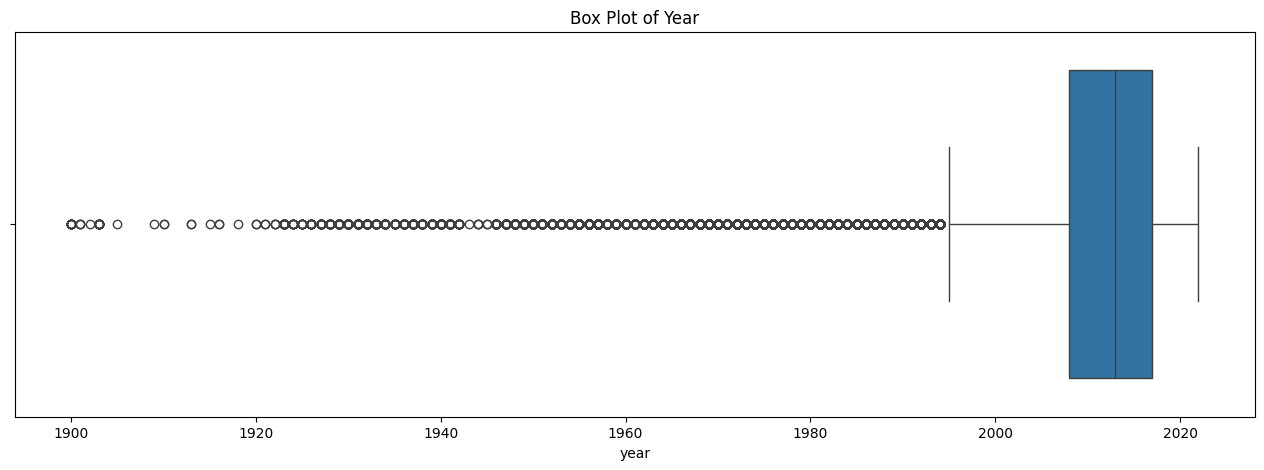

In [12]:
#box plot of 'year' to visualize outliers
plt.figure(figsize=(16,5))
sns.boxplot(data=sales_df1,x='year').set(title="Box Plot of Year")

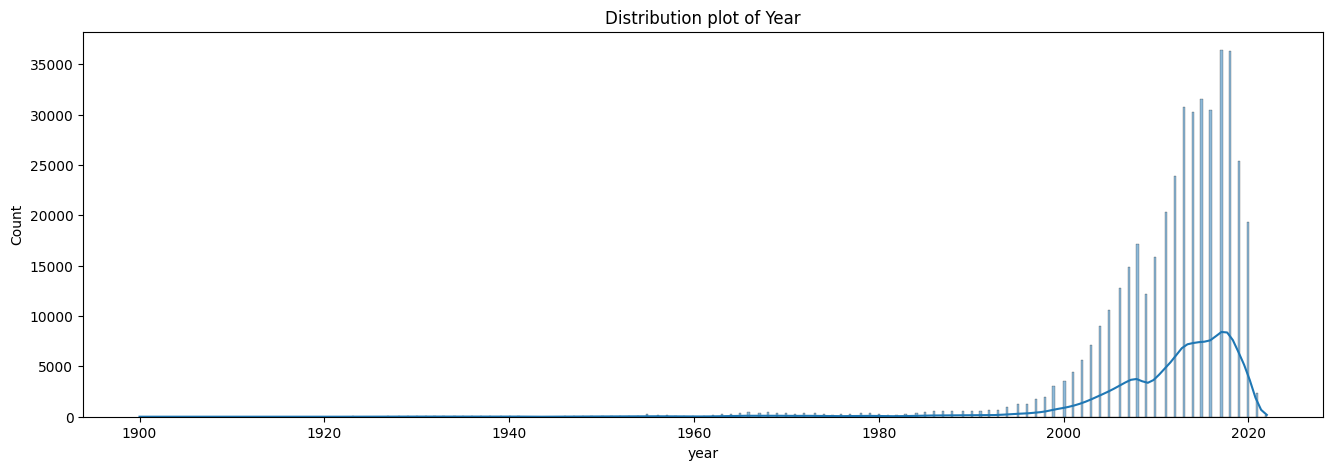

In [13]:
#Distribution plot of the year feature
plt.figure(figsize=(16,5))
sns.histplot(sales_df1['year'], kde=True).set(title = 'Distribution plot of Year')
plt.show()

In [14]:
# Maximum, Minimum, Std dev and Mean value of year
print('Max:', sales_df1['year'].max())
print('Min:', sales_df1['year'].min())
print('Mean:', sales_df1['year'].mean())
print('Std. Dev.:', sales_df1['year'].std())

Max: 2022.0
Min: 1900.0
Mean: 2011.23519116697
Std. Dev.: 9.452119581502558


In [15]:
#Upper and lower bounds for outliers
print("Upper bound",sales_df1['year'].mean() + 3*sales_df1['year'].std())
print("Lower bound",sales_df1['year'].mean() - 3*sales_df1['year'].std())

Upper bound 2039.5915499114776
Lower bound 1982.8788324224624


In [16]:
#Drop any observation outside of 3x std. dev.
sales_df2 = sales_df1[(sales_df1['year'] < 2039.5915499114776) & (sales_df1['year'] > 1982.8788324224624)]

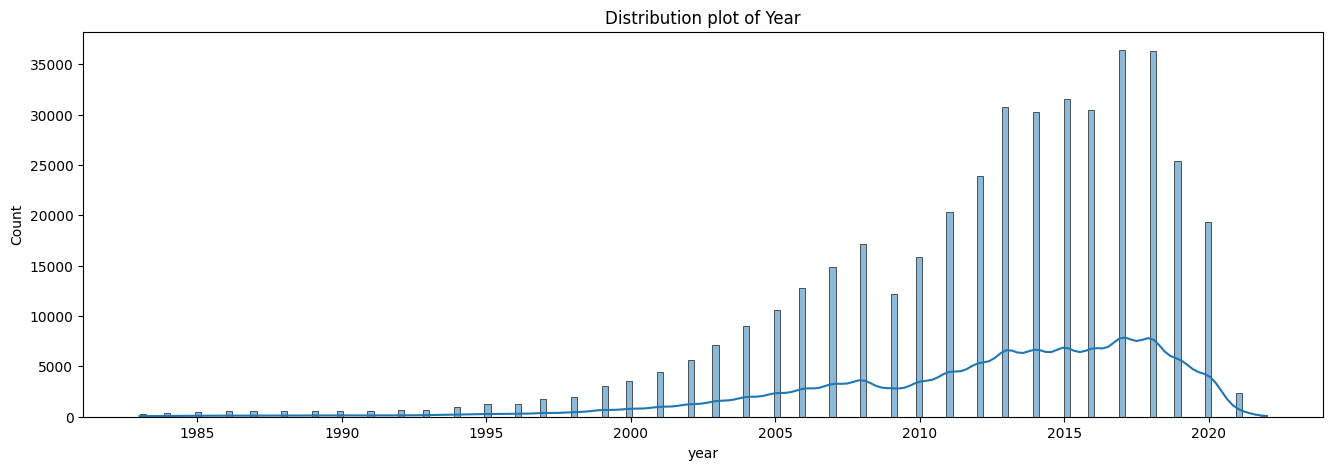

In [17]:
#Distribution plot of the year feature
plt.figure(figsize=(16,5))
sns.histplot(sales_df2['year'], kde=True).set(title = 'Distribution plot of Year')
plt.show()

This first iteration still has a significant tail on the left side \(right skewed\).  Another iteration will be needed to minimize this tail.

2nd iteration

In [18]:
# Maximum, Minimum, Std dev and Mean value of year 2nd iteration
print('Max:', sales_df2['year'].max())
print('Min:', sales_df2['year'].min())
print('Mean:', sales_df2['year'].mean())
print('Std. Dev.:', sales_df2['year'].std())

Max: 2022.0
Min: 1983.0
Mean: 2012.2586452339285
Std. Dev.: 6.180246767134033


In [19]:
#Upper and lower bounds for outliers according to 3 standard deviations
print("Upper bound",sales_df2['year'].mean() + 3*sales_df2['year'].std())
print("Lower bound",sales_df2['year'].mean() - 3*sales_df2['year'].std())

Upper bound 2030.7993855353307
Lower bound 1993.7179049325264


In [20]:
#Drop any observation outside of 3 stdv This will increase the number of outliers if 99% of the data is expected to be normal
sales_df3 = sales_df2[(sales_df2['year'] < 2030.7993855353307) & (sales_df2['year'] > 1993.7179049325264)]

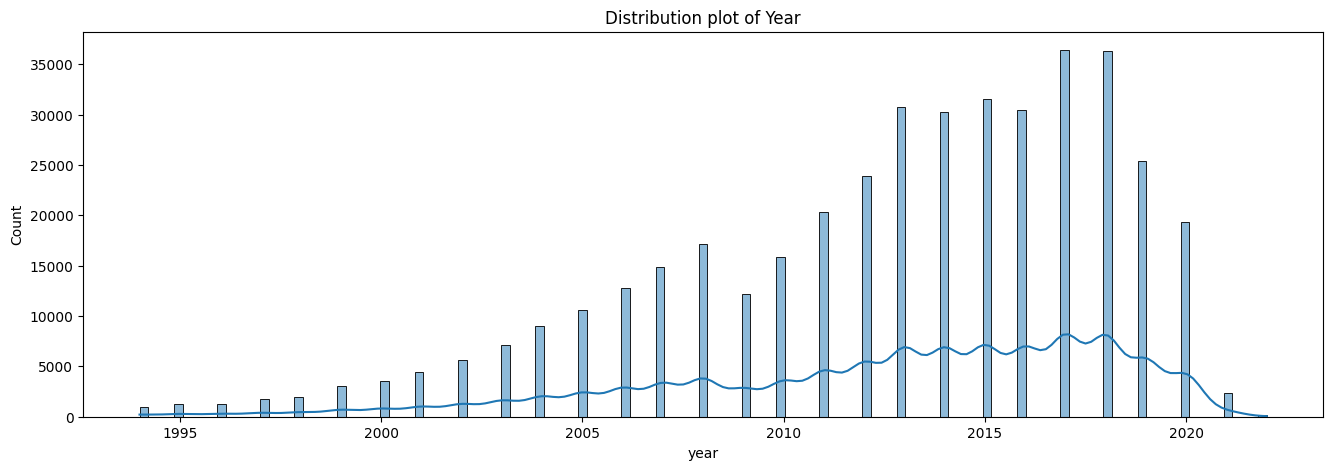

In [21]:
#Distribution plot of the year feature
plt.figure(figsize=(16,5))
sns.histplot(sales_df3['year'], kde=True).set(title = 'Distribution plot of Year')
plt.show()

[Text(0.5, 1.0, 'Box Plot of Year after droping outliers')]

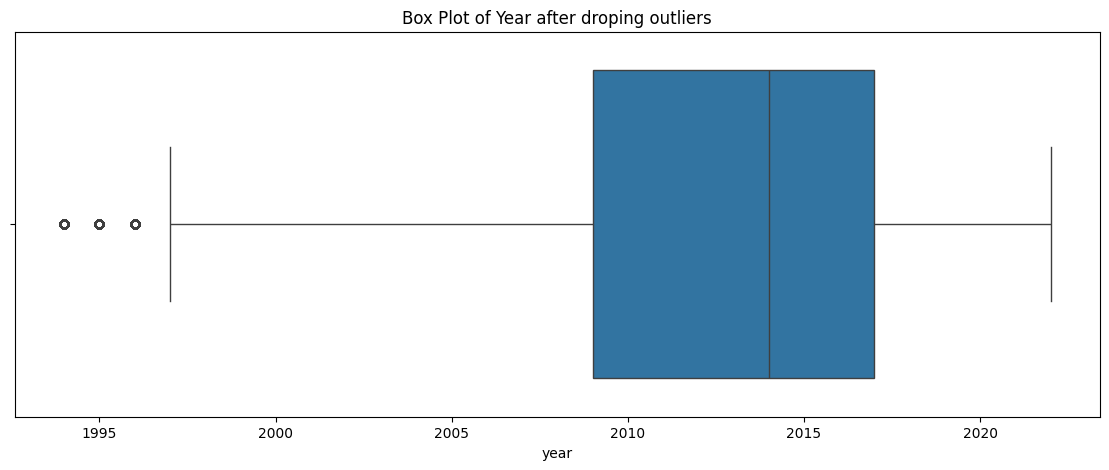

In [22]:
#box plot of 'Year' after taking out outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=sales_df3,x='year').set(title="Box Plot of Year after droping outliers")

In [23]:
#check to see number of observations left
sales_df3.shape

(410747, 14)

2\) **Odometer** feature outliers and distribution

[Text(0.5, 1.0, 'Box Plot of Odometer')]

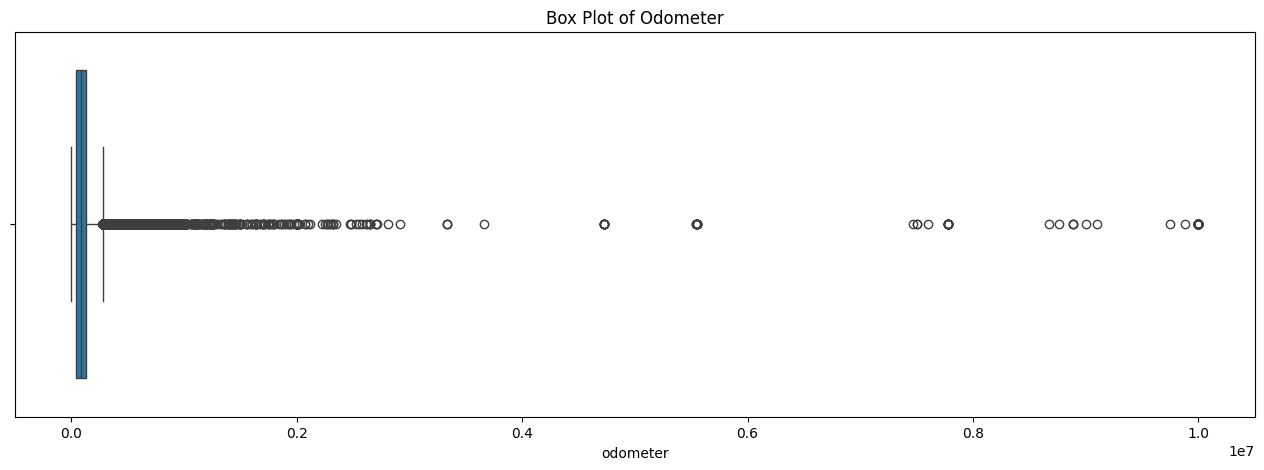

In [24]:
#box plot of 'odometer' to see outliers
plt.figure(figsize=(16,5))
sns.boxplot(data=sales_df3,x='odometer').set(title="Box Plot of Odometer")

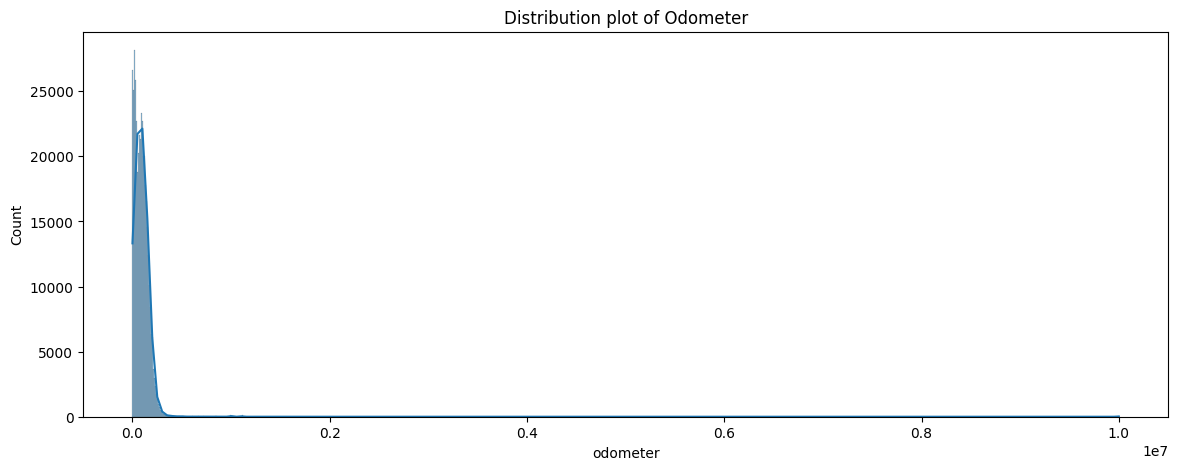

In [25]:
#Distribution plot of the odometer feature
plt.figure(figsize=(14,5))
sns.histplot(sales_df3, x='odometer', bins=1000, kde=True).set(title = 'Distribution plot of Odometer')
plt.show()

Remove anything above 300K miles as most car engines tend to break down after 300K.

In [26]:
#Drop all entries 300k and above
sales_df4 = sales_df3[(sales_df3['odometer'] <= 300000)]

In [27]:
# Maximum, Minimum, Std dev and Mean value of odometer
print('Max:', sales_df4['odometer'].max())
print('Min:', sales_df4['odometer'].min())
print('Mean:', sales_df4['odometer'].mean())
print('Std. Dev.:', sales_df4['odometer'].std())

Max: 300000.0
Min: 0.0
Mean: 90868.49806139174
Std. Dev.: 61288.6865252251


In [28]:
#Upper and lower bounds for outliers
print("Upper bound",sales_df4['odometer'].mean() + 3*sales_df4['odometer'].std())
print("Lower bound",sales_df4['odometer'].mean() - 3*sales_df4['odometer'].std())

Upper bound 274734.55763706705
Lower bound -92997.56151428354


In [29]:
#Drop any observation outside of 3x stdv.
sales_df5 = sales_df4[(sales_df4['odometer'] < 274734.55763706705) & (sales_df4['odometer'] > -92997.56151428354)]

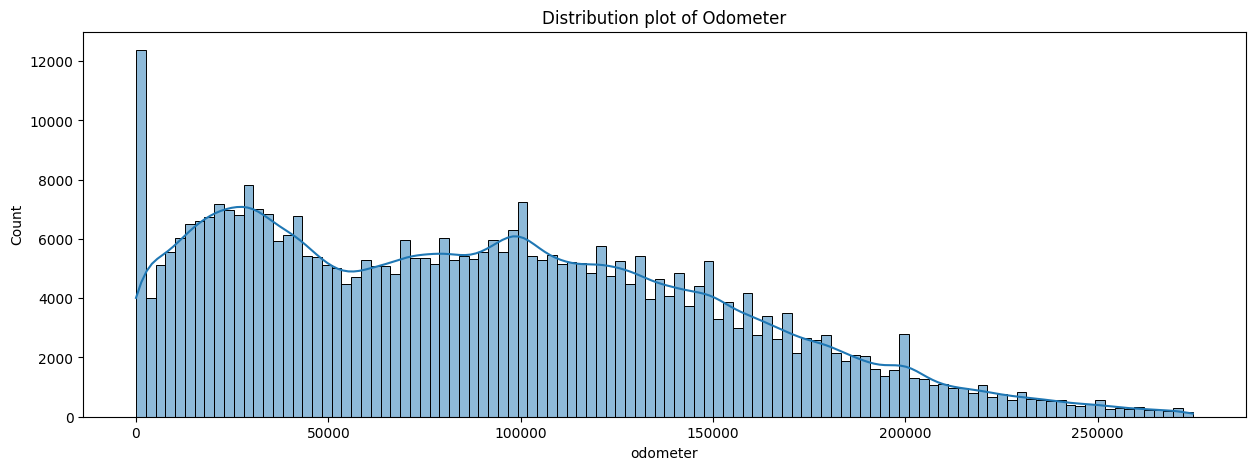

In [30]:
#Distribution plot of the odometer feature
plt.figure(figsize=(15,5))
sns.histplot(sales_df5, x='odometer', kde=True).set(title = 'Distribution plot of Odometer')
plt.show()

[Text(0.5, 1.0, 'Box Plot of Odometer')]

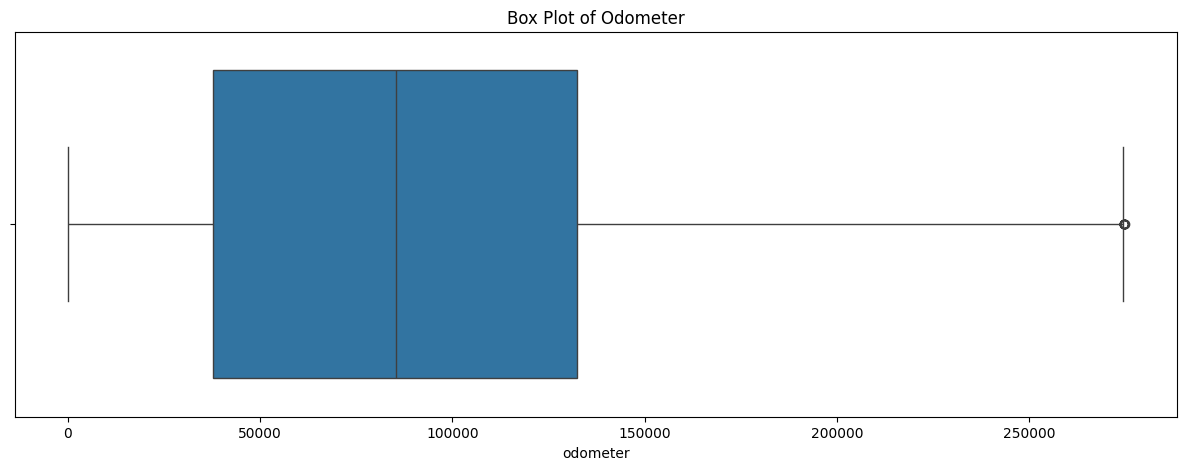

In [31]:
#box plot of 'odometer' to see outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=sales_df5,x='odometer').set(title="Box Plot of Odometer")

2\) **Price** feature outliers and distribution

[Text(0.5, 1.0, 'Box Plot of Price')]

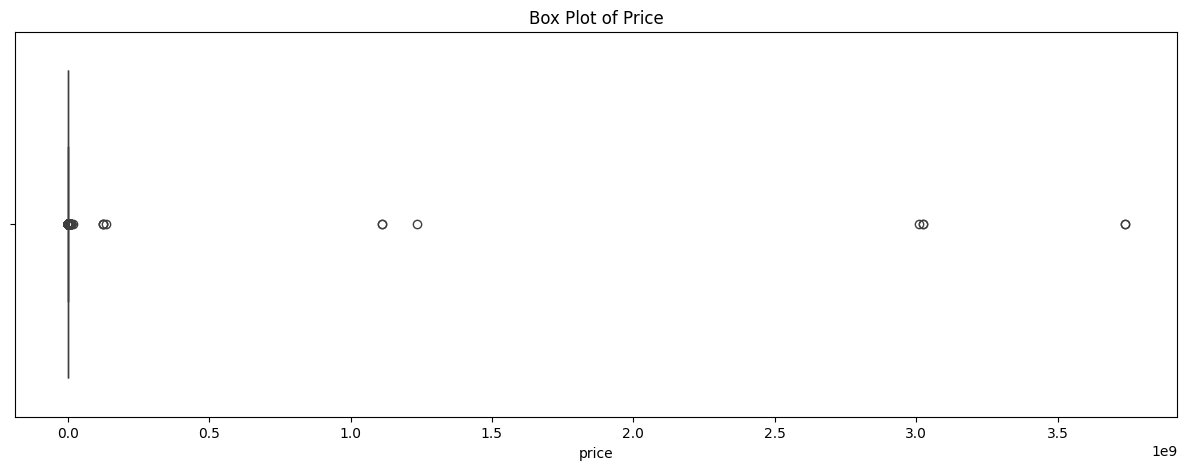

In [32]:
#box plot of 'price' to see outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=sales_df5,x='price').set(title="Box Plot of Price")

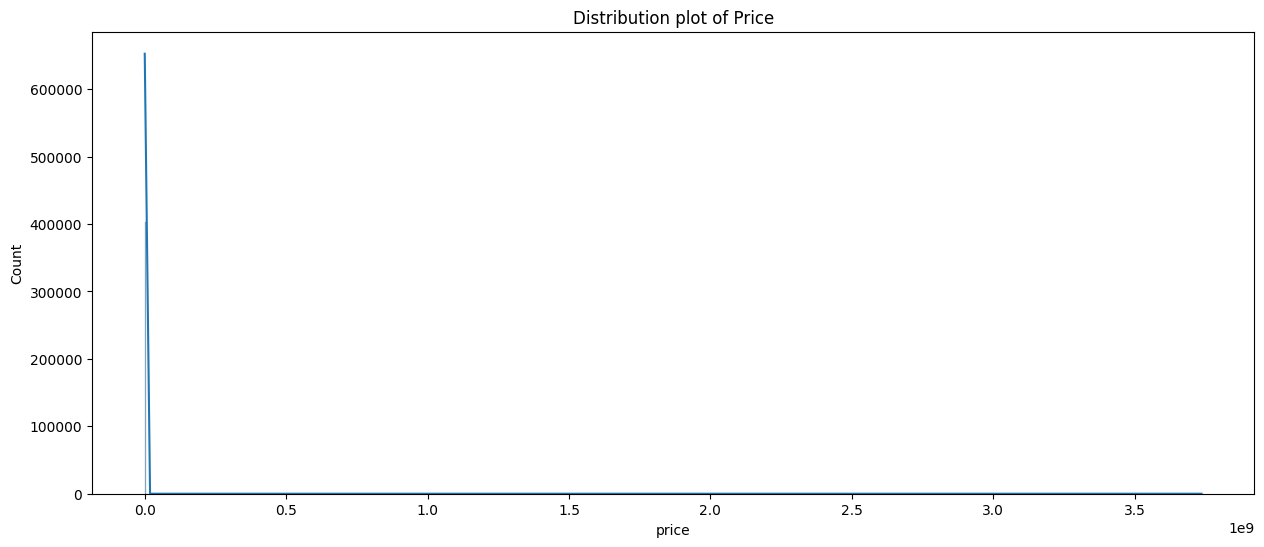

In [33]:
#Distribution plot of the odometer feature
plt.figure(figsize=(15,6))
sns.histplot(sales_df5, x='price', bins=1000, kde=True).set(title = 'Distribution plot of Price')
plt.show()

In [34]:
# Maximum, Minimum, Std dev and Mean value of price
print('Max:', sales_df5['price'].max())
print('Min:', sales_df5['price'].min())
print('Mean:', sales_df5['price'].mean())
print('Std. Dev.:', sales_df5['price'].std())

Max: 3736928711
Min: 0
Mean: 68895.89373676834
Std. Dev.: 12143303.378092544


In [35]:
#Eliminate outliers above 500k and below 100
sales_df6 = sales_df5[(sales_df5['price'] < 500000) & (sales_df5['price'] > 100)]

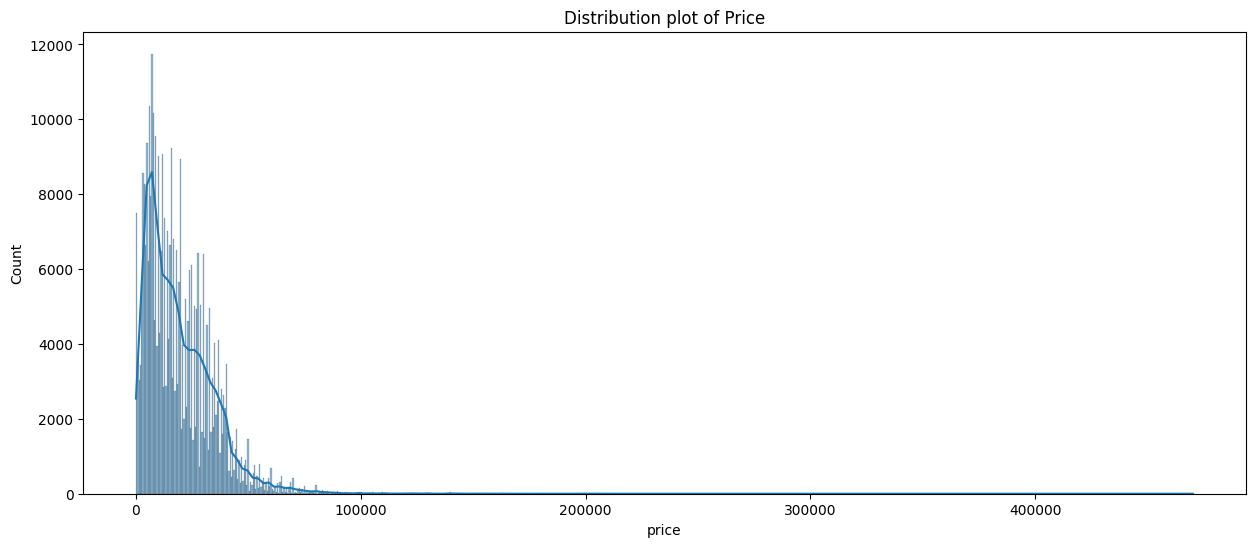

In [36]:
#New distribution plot of the odometer feature
plt.figure(figsize=(15,6))
sns.histplot(sales_df6, x='price', kde=True).set(title = 'Distribution plot of Price')
plt.show()

2nd iteration

In [37]:
# Maximum, Minimum, Std dev and Mean value of price
print('Max:', sales_df6['price'].max())
print('Min:', sales_df6['price'].min())
print('Mean:', sales_df6['price'].mean())
print('Std. Dev.:', sales_df6['price'].std())

Max: 470000
Min: 101
Mean: 19236.246991935135
Std. Dev.: 15213.707865190674


In [38]:
#Upper and lower bounds for price
print("Upper bound",sales_df6['price'].mean() + 3*sales_df6['price'].std())
print("Lower bound",sales_df6['price'].mean() - 3*sales_df6['price'].std())

Upper bound 64877.370587507154
Lower bound -26404.876603636883


In [39]:
#Drop any observation outside of 3x std. dev.
sales_df7 = sales_df6[(sales_df6['price'] < 64877.370587507154) & (sales_df6['price'] > -26404.876603636883)]

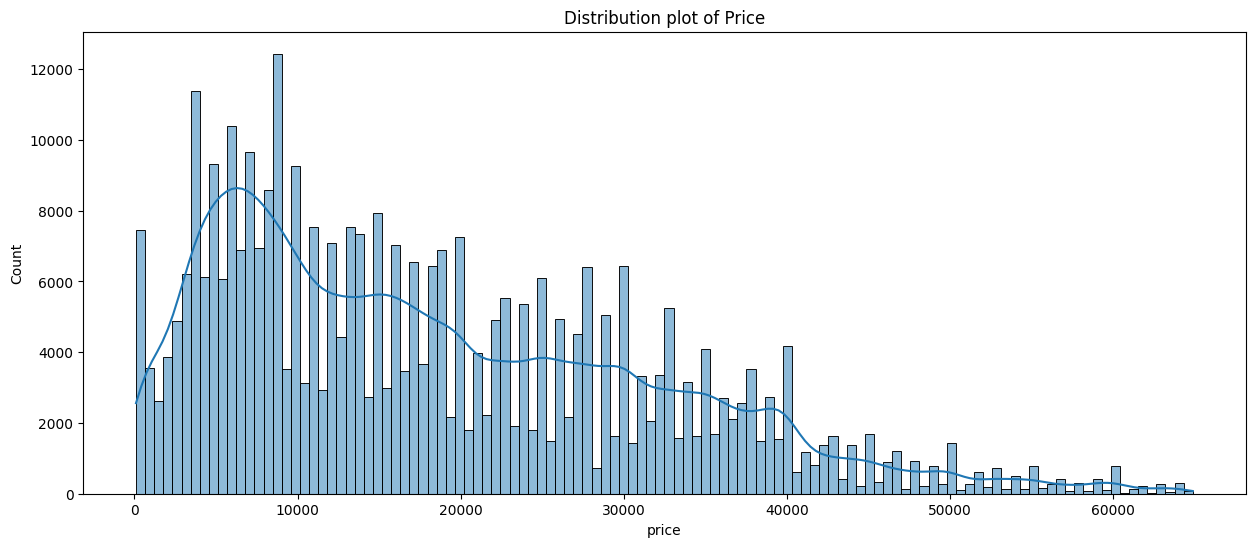

In [40]:
#New distribution plot of the odometer feature
plt.figure(figsize=(15,6))
sns.histplot(sales_df7, x='price', kde=True).set(title = 'Distribution plot of Price')
plt.show()

In [41]:
# Maximum, Minimum, Std dev and Mean value of price
print('Max:', sales_df7['price'].max())
print('Min:', sales_df7['price'].min())
print('Mean:', sales_df7['price'].mean())
print('Std. Dev.:', sales_df7['price'].std())

Max: 64875
Min: 101
Mean: 18454.32905433026
Std. Dev.: 13196.947532416016


In [42]:
#Upper and lower bounds for price
print("Upper bound",sales_df7['price'].mean() + 3*sales_df7['price'].std())
print("Lower bound",sales_df7['price'].mean() - 3*sales_df7['price'].std())

Upper bound 58045.171651578305
Lower bound -21136.513542917786


In [43]:
#Drop any observation outside of 3x std. dev.
sales_df8 = sales_df7[(sales_df7['price'] < 58045.171651578305) & (sales_df7['price'] > -21136.513542917786)]

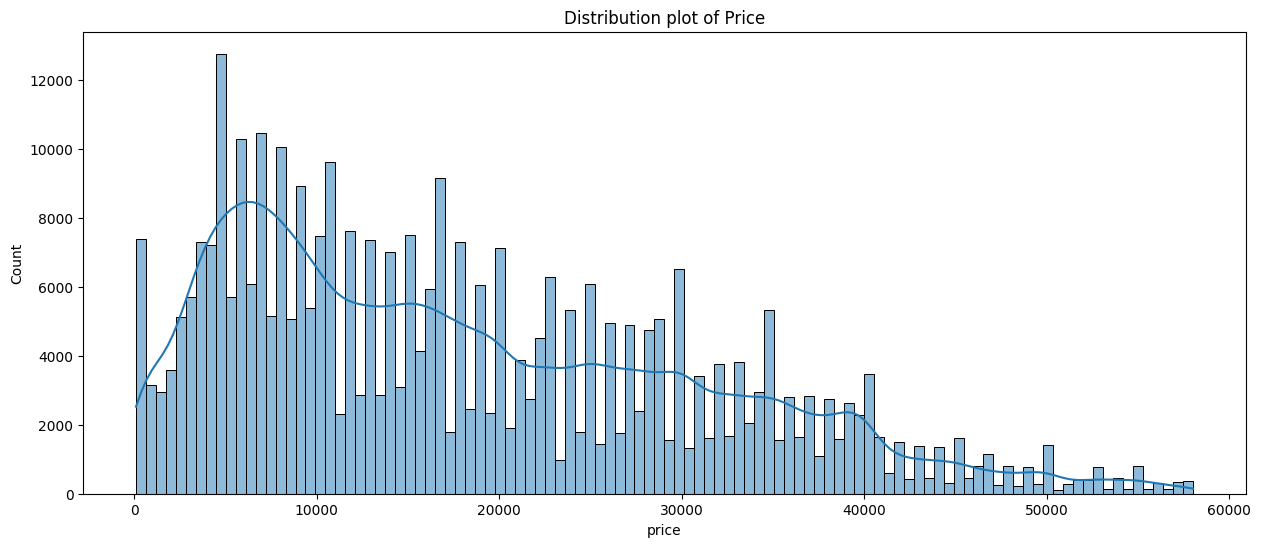

In [44]:
#New distribution plot of the odometer feature
plt.figure(figsize=(15,6))
sns.histplot(sales_df8, x='price', kde=True).set(title = 'Distribution plot of Price')
plt.show()

[Text(0.5, 1.0, 'Box Plot of Price')]

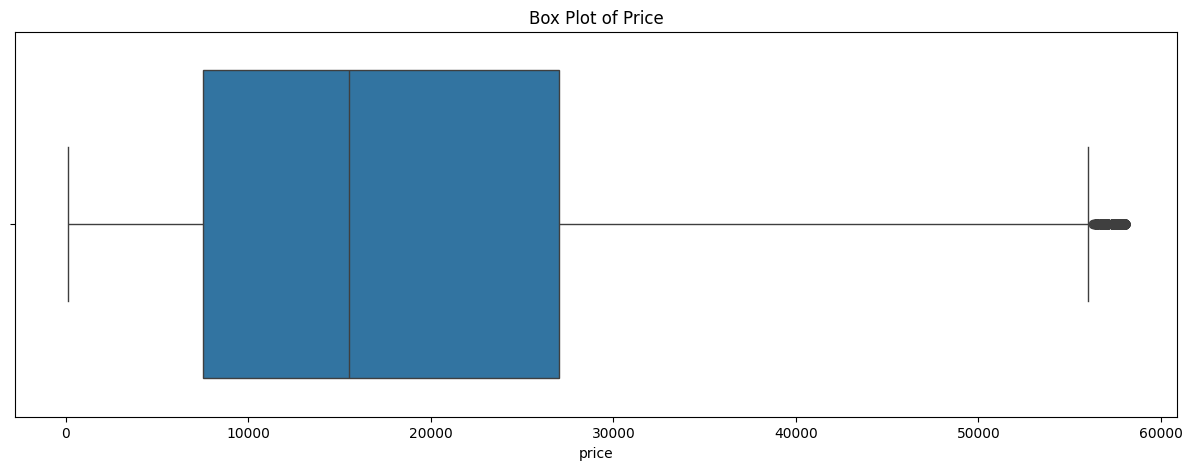

In [45]:
#box plot of 'price' to see outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=sales_df8,x='price').set(title="Box Plot of Price")

In [46]:
#How many observations do we have
sales_df8.shape

(362009, 14)

The majority of the outliers have been eliminated for price, odometer and year features.  Although the distributions are skewed further iterations will not improve the data much.  The data will later be standardized before it is put through a regression model.

###NaN Values

In [47]:
# Show NaN percentage in the most current dataset
sales_df8.isna().sum()/sales_df8.shape[0]*100

,0
region,0.000000
price,0.000000
year,0.000000
manufacturer,3.032798
condition,38.058999
cylinders,40.912795
fuel,0.574019
odometer,0.000000
title_status,1.925090
transmission,0.394742


In [48]:
sales_df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362009 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        362009 non-null  object 
 1   price         362009 non-null  int64  
 2   year          362009 non-null  float64
 3   manufacturer  351030 non-null  object 
 4   condition     224232 non-null  object 
 5   cylinders     213901 non-null  object 
 6   fuel          359931 non-null  object 
 7   odometer      362009 non-null  float64
 8   title_status  355040 non-null  object 
 9   transmission  360580 non-null  object 
 10  drive         251886 non-null  object 
 11  type          287005 non-null  object 
 12  paint_color   256077 non-null  object 
 13  state         362009 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 41.4+ MB


In [49]:
rand = rand_sample(sales_df8['condition'], 100)
rand

array(['excellent', 'excellent', nan, nan, 'good', 'excellent', nan,
       'excellent', nan, nan, 'excellent', 'excellent', 'good', 'good',
       nan, nan, 'good', nan, nan, 'excellent', 'good', nan, 'like new',
       'good', nan, nan, nan, nan, 'excellent', nan, nan, nan,
       'excellent', 'good', 'good', 'good', 'good', nan, 'excellent',
       'good', nan, 'excellent', 'good', nan, 'good', nan, 'good', 'good',
       nan, 'good', nan, nan, 'good', 'good', 'excellent', nan,
       'excellent', nan, 'excellent', nan, 'good', nan, 'good', 'good',
       nan, 'good', 'good', 'excellent', 'like new', 'excellent', 'good',
       nan, 'excellent', 'excellent', 'good', nan, nan, 'excellent',
       'excellent', 'excellent', 'good', nan, 'good', 'like new', 'good',
       'good', 'excellent', 'excellent', nan, 'excellent', nan, nan,
       'excellent', nan, 'excellent', 'like new', 'like new', nan, nan,
       'excellent'], dtype=object)

In [50]:
rand = rand_sample(sales_df8['cylinders'], 100)
rand

array(['4 cylinders', '8 cylinders', '4 cylinders', '6 cylinders',
       '6 cylinders', '8 cylinders', '8 cylinders', nan, '6 cylinders',
       '6 cylinders', nan, '4 cylinders', '6 cylinders', nan,
       '6 cylinders', nan, '6 cylinders', '6 cylinders', '6 cylinders',
       nan, nan, nan, nan, '6 cylinders', '6 cylinders', '6 cylinders',
       nan, nan, '4 cylinders', '8 cylinders', '8 cylinders',
       '4 cylinders', '8 cylinders', nan, '4 cylinders', '6 cylinders',
       nan, nan, '6 cylinders', nan, nan, nan, nan, '4 cylinders',
       '4 cylinders', nan, '4 cylinders', '4 cylinders', '4 cylinders',
       '6 cylinders', nan, nan, '4 cylinders', '6 cylinders',
       '6 cylinders', nan, '4 cylinders', nan, nan, '6 cylinders', nan,
       '4 cylinders', nan, nan, '6 cylinders', '6 cylinders', nan, nan,
       '6 cylinders', '6 cylinders', nan, '8 cylinders', '6 cylinders',
       '4 cylinders', '8 cylinders', nan, '12 cylinders', '8 cylinders',
       '6 cylinders', nan, '4 c

In [51]:
rand = rand_sample(sales_df8['drive'], 100)
rand

array([nan, '4wd', 'fwd', nan, '4wd', 'fwd', 'fwd', 'fwd', 'fwd', 'fwd',
       '4wd', '4wd', 'fwd', 'fwd', '4wd', 'rwd', 'fwd', '4wd', nan, 'fwd',
       '4wd', '4wd', nan, 'rwd', 'fwd', nan, '4wd', 'fwd', nan, nan,
       'fwd', '4wd', 'fwd', nan, 'fwd', '4wd', 'fwd', nan, '4wd', '4wd',
       nan, 'fwd', 'rwd', 'fwd', 'fwd', nan, 'rwd', 'fwd', 'fwd', nan,
       nan, '4wd', 'rwd', nan, 'fwd', '4wd', nan, '4wd', 'rwd', 'fwd',
       nan, nan, 'fwd', 'fwd', '4wd', nan, nan, 'fwd', '4wd', 'fwd',
       'fwd', 'fwd', 'rwd', 'fwd', nan, nan, '4wd', nan, nan, 'rwd',
       'fwd', 'rwd', 'fwd', '4wd', 'fwd', nan, '4wd', nan, 'fwd', '4wd',
       'fwd', 'rwd', '4wd', '4wd', 'rwd', nan, nan, nan, 'fwd', '4wd'],
      dtype=object)

In [52]:
rand = rand_sample(sales_df8['type'], 100)
rand

array(['coupe', 'other', nan, 'SUV', 'pickup', 'mini-van', nan, nan,
       'sedan', 'SUV', 'sedan', 'pickup', nan, 'pickup', 'other',
       'pickup', 'sedan', 'SUV', nan, 'other', nan, nan, 'sedan', 'SUV',
       nan, nan, 'sedan', 'truck', 'pickup', nan, 'mini-van', nan, nan,
       'sedan', nan, 'sedan', 'convertible', 'SUV', 'pickup', 'SUV', nan,
       nan, 'van', 'pickup', 'sedan', 'pickup', 'truck', 'SUV', 'SUV',
       'sedan', nan, 'sedan', 'coupe', 'sedan', 'sedan', 'sedan', 'SUV',
       'pickup', 'sedan', 'van', 'sedan', 'SUV', 'sedan', 'SUV', 'pickup',
       nan, nan, 'coupe', nan, 'sedan', nan, 'truck', 'wagon', 'pickup',
       'SUV', nan, 'coupe', nan, nan, 'sedan', 'pickup', nan, nan, 'SUV',
       'SUV', 'pickup', 'other', 'coupe', 'SUV', 'other', nan, nan,
       'pickup', 'SUV', nan, 'pickup', 'pickup', nan, 'pickup', 'truck'],
      dtype=object)

In [53]:
rand = rand_sample(sales_df8['paint_color'], 100)
rand

array(['white', 'black', 'red', 'white', 'blue', 'silver', nan, 'black',
       'silver', 'white', 'white', nan, nan, 'green', 'white', 'custom',
       'yellow', 'white', nan, nan, 'black', nan, nan, 'black', nan, nan,
       'orange', 'silver', nan, 'white', nan, 'black', 'black', nan,
       'silver', nan, 'silver', 'silver', 'white', 'blue', 'silver',
       'grey', 'white', 'black', 'silver', nan, nan, 'custom', 'yellow',
       'blue', 'red', nan, 'black', nan, nan, nan, 'black', 'white',
       'grey', 'silver', 'silver', 'grey', nan, nan, 'white', 'red',
       'grey', nan, 'silver', 'red', nan, nan, 'black', 'blue', nan,
       'blue', 'white', 'silver', 'blue', 'grey', nan, 'red', 'blue',
       'black', nan, 'black', 'white', nan, 'white', 'black', 'grey',
       'black', nan, 'green', nan, nan, nan, 'blue', 'silver', 'red'],
      dtype=object)

Imputation of ***NaN***

In [54]:
#Create a dictionary for the null values according to their percentage
print('Null Value Dictionary:\n')
null_dict = {}
for icol in sales_df8.columns.values:
    null_dict[icol] = ((sales_df8[icol].isna().sum())/sales_df8.shape[0])*100
print(null_dict)

# sorting the null dictionary based on value
print('\n----------------------\n')
print('Null Value Percentage Dictionary:\n')
sorted_nulldict = {}
sorted_keys = sorted(null_dict, key = null_dict.get)  # [1, 3, 2]

for w in sorted_keys:
    sorted_nulldict[w] = null_dict[w]
print(sorted_nulldict)

Null Value Dictionary:

{'region': 0.0, 'price': 0.0, 'year': 0.0, 'manufacturer': 3.032797527133303, 'condition': 38.05899853318564, 'cylinders': 40.91279498576002, 'fuel': 0.5740188779836966, 'odometer': 0.0, 'title_status': 1.9250902601869013, 'transmission': 0.39474156719860554, 'drive': 30.419961934648033, 'type': 20.718821907742623, 'paint_color': 29.26225591076465, 'state': 0.0}

----------------------

Null Value Percentage Dictionary:

{'region': 0.0, 'price': 0.0, 'year': 0.0, 'odometer': 0.0, 'state': 0.0, 'transmission': 0.39474156719860554, 'fuel': 0.5740188779836966, 'title_status': 1.9250902601869013, 'manufacturer': 3.032797527133303, 'type': 20.718821907742623, 'paint_color': 29.26225591076465, 'drive': 30.419961934648033, 'condition': 38.05899853318564, 'cylinders': 40.91279498576002}


In [55]:
sales_df8

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [56]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42, max_iter=10, sample_posterior=True)

In [57]:
#Identify which are categorical variables since KNNImputer cannot be performed on strings
cat_variables = sales_df8[['region', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive',
                          'type', 'paint_color', 'state']]

In [58]:
#Create the loop to impute values using knnimputer for integer and the mode for categorical variables that are missing less than 5% of their data
for key in sorted_nulldict:
    if key in ['year','odometer']:
        continue
    if sorted_nulldict[key] > 0 and sorted_nulldict[key]<5:
        if key in cat_variables:
            sales_df8[key] = sales_df8[key].fillna(sales_df8[key].mode().iloc[0])
        else:
            sales_df8[key] = imputer.fit_transform(sales_df8[key])

<ipython-input-58-4d9c825199a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df8[key] = sales_df8[key].fillna(sales_df8[key].mode().iloc[0])


In [59]:
sales_df8

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [60]:
# Label NaN values as missing for features with more than 5% NaN values.

for key in sorted_nulldict:
    if sorted_nulldict[key]>5 and key in cat_variables:
        sales_df8[key] = sales_df8[key].fillna('missing')

<ipython-input-60-547010175a77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df8[key] = sales_df8[key].fillna('missing')


In [61]:
sales_df8

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,missing,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,missing,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,missing,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,missing,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,missing,wy
426876,wyoming,30590,2020.0,volvo,good,missing,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,missing,diesel,4174.0,clean,other,missing,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [62]:
#Confirm there are no more NaN
sales_df8.isna().sum()/sales_df8.shape[0]*100

,0
region,0.0
price,0.0
year,0.0
manufacturer,0.0
condition,0.0
cylinders,0.0
fuel,0.0
odometer,0.0
title_status,0.0
transmission,0.0


###Label Encoding

In [63]:
sales_encoded_df = sales_df8

In [64]:
label_encoder = preprocessing.LabelEncoder()
#Encode each feature and print the legend of each encoded feature
for i in cat_variables:
    sales_encoded_df[i] = label_encoder.fit_transform(sales_df8[i])
    label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(label_encoder_name_mapping)
    print('\n-----------\n')

<ipython-input-64-1b7a87a5c8fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_encoded_df[i] = label_encoder.fit_transform(sales_df8[i])
<ipython-input-64-1b7a87a5c8fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_encoded_df[i] = label_encoder.fit_transform(sales_df8[i])
<ipython-input-64-1b7a87a5c8fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

{'SF bay area': 0, 'abilene': 1, 'akron / canton': 2, 'albany': 3, 'albuquerque': 4, 'altoona-johnstown': 5, 'amarillo': 6, 'ames': 7, 'anchorage / mat-su': 8, 'ann arbor': 9, 'annapolis': 10, 'appleton-oshkosh-FDL': 11, 'asheville': 12, 'ashtabula': 13, 'athens': 14, 'atlanta': 15, 'auburn': 16, 'augusta': 17, 'austin': 18, 'bakersfield': 19, 'baltimore': 20, 'baton rouge': 21, 'battle creek': 22, 'beaumont / port arthur': 23, 'bellingham': 24, 'bemidji': 25, 'bend': 26, 'billings': 27, 'binghamton': 28, 'birmingham': 29, 'bismarck': 30, 'bloomington': 31, 'bloomington-normal': 32, 'boise': 33, 'boone': 34, 'boston': 35, 'boulder': 36, 'bowling green': 37, 'bozeman': 38, 'brainerd': 39, 'brownsville': 40, 'brunswick': 41, 'buffalo': 42, 'butte': 43, 'cape cod / islands': 44, 'catskills': 45, 'cedar rapids': 46, 'central NJ': 47, 'central louisiana': 48, 'central michigan': 49, 'champaign urbana': 50, 'charleston': 51, 'charlotte': 52, 'charlottesville': 53, 'chattanooga': 54, 'chautau

<ipython-input-64-1b7a87a5c8fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_encoded_df[i] = label_encoder.fit_transform(sales_df8[i])
<ipython-input-64-1b7a87a5c8fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_encoded_df[i] = label_encoder.fit_transform(sales_df8[i])
<ipython-input-64-1b7a87a5c8fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

{'diesel': 0, 'electric': 1, 'gas': 2, 'hybrid': 3, 'other': 4}

-----------

{'clean': 0, 'lien': 1, 'missing': 2, 'parts only': 3, 'rebuilt': 4, 'salvage': 5}

-----------

{'automatic': 0, 'manual': 1, 'other': 2}

-----------



<ipython-input-64-1b7a87a5c8fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_encoded_df[i] = label_encoder.fit_transform(sales_df8[i])
<ipython-input-64-1b7a87a5c8fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_encoded_df[i] = label_encoder.fit_transform(sales_df8[i])


{'4wd': 0, 'fwd': 1, 'missing': 2, 'rwd': 3}

-----------

{'SUV': 0, 'bus': 1, 'convertible': 2, 'coupe': 3, 'hatchback': 4, 'mini-van': 5, 'missing': 6, 'offroad': 7, 'other': 8, 'pickup': 9, 'sedan': 10, 'truck': 11, 'van': 12, 'wagon': 13}

-----------

{'black': 0, 'blue': 1, 'brown': 2, 'custom': 3, 'green': 4, 'grey': 5, 'missing': 6, 'orange': 7, 'purple': 8, 'red': 9, 'silver': 10, 'white': 11, 'yellow': 12}

-----------

{'ak': 0, 'al': 1, 'ar': 2, 'az': 3, 'ca': 4, 'co': 5, 'ct': 6, 'dc': 7, 'de': 8, 'fl': 9, 'ga': 10, 'hi': 11, 'ia': 12, 'id': 13, 'il': 14, 'in': 15, 'ks': 16, 'ky': 17, 'la': 18, 'ma': 19, 'md': 20, 'me': 21, 'mi': 22, 'mn': 23, 'mo': 24, 'ms': 25, 'mt': 26, 'nc': 27, 'nd': 28, 'ne': 29, 'nh': 30, 'nj': 31, 'nm': 32, 'nv': 33, 'ny': 34, 'oh': 35, 'ok': 36, 'or': 37, 'pa': 38, 'ri': 39, 'sc': 40, 'sd': 41, 'tn': 42, 'tx': 43, 'ut': 44, 'va': 45, 'vt': 46, 'wa': 47, 'wi': 48, 'wv': 49, 'wy': 50}

-----------



<ipython-input-64-1b7a87a5c8fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_encoded_df[i] = label_encoder.fit_transform(sales_df8[i])
<ipython-input-64-1b7a87a5c8fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_encoded_df[i] = label_encoder.fit_transform(sales_df8[i])


In [65]:
sales_encoded_df

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,16,33590,2014.0,13,2,6,2,57923.0,0,2,2,9,11,1
28,16,22590,2010.0,7,2,6,2,71229.0,0,2,2,9,1,1
29,16,39590,2020.0,7,2,6,2,19160.0,0,2,2,9,9,1
30,16,30990,2017.0,38,2,6,2,41124.0,0,2,2,9,9,1
31,16,15000,2013.0,12,0,5,2,128000.0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,2019.0,30,2,5,2,32226.0,0,2,1,10,6,50
426876,397,30590,2020.0,40,2,7,2,12029.0,0,2,1,10,9,50
426877,397,34990,2020.0,6,2,7,0,4174.0,0,2,2,4,11,50
426878,397,28990,2018.0,22,2,5,2,30112.0,0,2,1,10,10,50


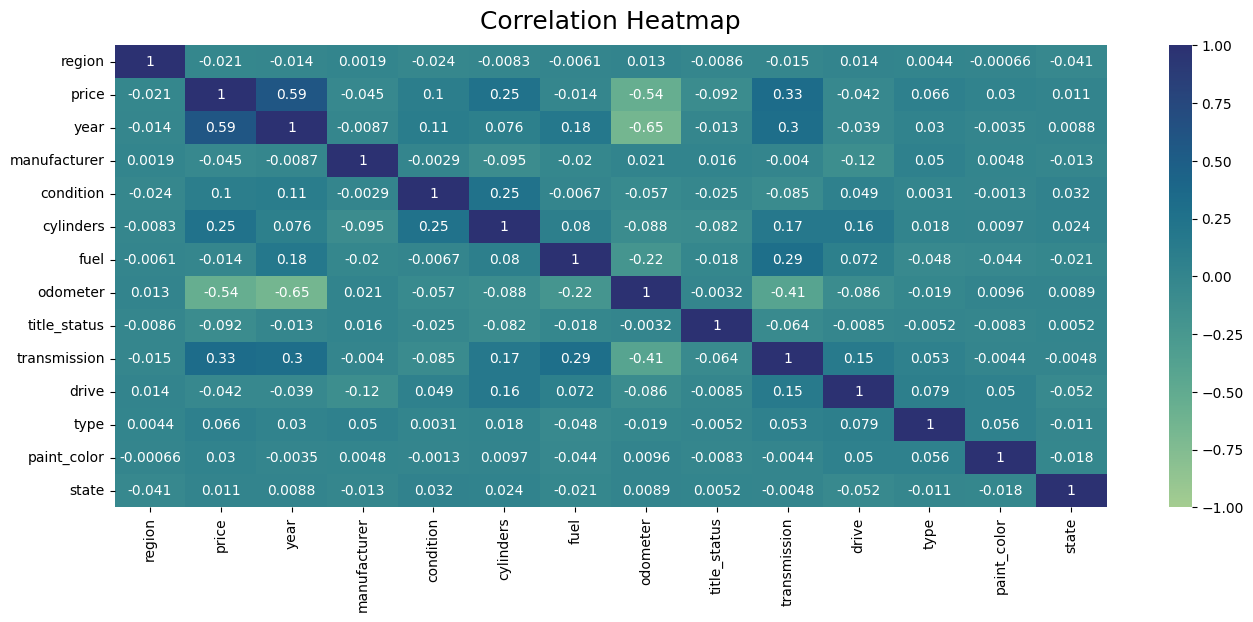

In [66]:
#Create a correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(sales_encoded_df.corr(), vmin=-1, vmax=1, annot=True, cmap='crest')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [67]:
sales_final_df = sales_encoded_df

The heat map shows that price and year are positive correlated.  Also, there seems to be a slight positive correlation between transmission and price.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Linear Regression, polynomial of degree 2 and 3 models will be trained and tested on the final dataset.  The models will be evaluated according to their MAE, MSE and Score/r^2.

###Regression

In [68]:
# split the data into training data and develoment data using

X = sales_final_df.drop(columns = ['price'])
y = sales_final_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=True)

In [69]:
X_train

,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
366776,40,2020.0,4,4,7,2,29824.0,0,0,2,6,0,43
176966,233,2011.0,7,2,7,2,127000.0,2,0,2,6,12,18
219129,240,2018.0,3,2,7,2,13035.0,0,2,1,10,6,25
425861,382,2020.0,33,2,7,4,3075.0,0,0,0,9,11,48
210970,39,2017.0,30,4,7,2,22275.0,0,0,2,6,11,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424431,216,2017.0,3,2,5,2,28034.0,0,2,2,8,10,48
422609,216,2002.0,26,4,7,2,1.0,0,0,2,0,6,48
179904,203,2004.0,12,3,6,2,200000.0,0,0,0,6,6,21
140635,56,2003.0,4,4,5,2,68700.0,0,0,3,2,5,14


###Linear Regression

In [70]:
#Building a pipeline for the linear regression

Linear_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('linear', LinearRegression())])


#Perform Linear regression on the data

Linear_pipe.fit(X_train, y_train)
train_predict=Linear_pipe.predict(X_train)
test_predict=Linear_pipe.predict(X_test)


#Regression Error
Linear_train_mse = mean_squared_error(train_predict, y_train)
Linear_test_mse = mean_squared_error(test_predict, y_test)
Linear_train_mae = mean_absolute_error(train_predict, y_train)
Linear_test_mae = mean_absolute_error(test_predict, y_test)



#Check
linear_coefs = Linear_pipe.named_steps['linear'].coef_
print(Linear_pipe)
#print(linear_coefs)

print(f"Linear Model: train_mse={Linear_train_mse}, test_mse={Linear_test_mse}")
print(f"Linear Model: train_mae={Linear_train_mae}, test_mae={Linear_test_mae}")
print(Linear_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])
Linear Model: train_mse=84038413.31951857, test_mse=84259891.94645888
Linear Model: train_mae=6952.778293237625, test_mae=6951.942115239117
0.4816192625612996


###Polynomial Regression degree 2

In [71]:
#Building a pipeline for the polynomial regression

Poly2_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=2, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly2_pipe.fit(X_train, y_train)
train_predict=Poly2_pipe.predict(X_train)
test_predict=Poly2_pipe.predict(X_test)


#Regression Error
Poly2_train_mse = mean_squared_error(train_predict, y_train)
Poly2_test_mse = mean_squared_error(test_predict, y_test)
Poly2_train_mae = mean_absolute_error(train_predict, y_train)
Poly2_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Poly2_coefs = Poly2_pipe.named_steps['linear'].coef_
print(Poly2_pipe)
#print(Poly2_coefs)

print(f"Polynomial Degree 2 Model: train_mse={Poly2_train_mse}, test_mse={Poly2_test_mse}")
print(f"Polynomial Degree 2 Model: train_mae={Poly2_train_mae}, test_mae={Poly2_test_mae}")
print(Poly2_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])
Polynomial Degree 2 Model: train_mse=59573727.30947589, test_mse=59787838.43750471
Polynomial Degree 2 Model: train_mae=5500.645128199897, test_mae=5499.323110279847
0.6321753676257582


###Polynomial Regression degree 3

In [72]:
#Building a pipeline for the polynomial regression

Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly3_pipe.fit(X_train, y_train)
train_predict=Poly3_pipe.predict(X_train)
test_predict=Poly3_pipe.predict(X_test)


#Regression Error
Poly3_train_mse = mean_squared_error(train_predict, y_train)
Poly3_test_mse = mean_squared_error(test_predict, y_test)
Poly3_train_mae = mean_absolute_error(train_predict, y_train)
Poly3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Poly3_coefs = Poly3_pipe.named_steps['linear'].coef_
print(Poly3_pipe)
#print(Poly3_coefs)

print(f"Polynomial Degree 3 Model: train_mse={Poly3_train_mse}, test_mse={Poly3_test_mse}")
print(f"Polynomial Degree 3 Model: train_mae={Poly3_train_mae}, test_mae={Poly3_test_mae}")
print(Poly3_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linear', LinearRegression())])
Polynomial Degree 3 Model: train_mse=49966882.83466318, test_mse=50320897.596005
Polynomial Degree 3 Model: train_mae=4895.726873799413, test_mae=4909.083189822973
0.6904175474023895


###Polynomial Regression degree 2 - LASSO

In [73]:
#We now try using lasso to offer a penalized regression method

Lasso2_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=2, include_bias=False)),
                       ('lasso', Lasso(random_state=42))])

#Perform polynomial regression on the data

Lasso2_pipe.fit(X_train, y_train)
train_predict=Lasso2_pipe.predict(X_train)
test_predict=Lasso2_pipe.predict(X_test)


#Regression Error
Lasso2_train_mse = mean_squared_error(train_predict, y_train)
Lasso2_test_mse = mean_squared_error(test_predict, y_test)
Lasso2_train_mae = mean_absolute_error(train_predict, y_train)
Lasso2_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Lasso2_coefs = Lasso2_pipe.named_steps['lasso'].coef_
print(Lasso2_pipe)
#print(Lasso2_coefs)

print(f"Lasso Degree 2 Model: train_mse={Lasso2_train_mse}, test_mse={Lasso2_test_mse}")
print(f"Lasso Degree 2 Model: train_mae={Lasso2_train_mae}, test_mae={Lasso2_test_mae}")
print(Lasso2_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform', PolynomialFeatures(include_bias=False)),
                ('lasso', Lasso(random_state=42))])
Lasso Degree 2 Model: train_mse=59573973.11715209, test_mse=59787284.0201716
Lasso Degree 2 Model: train_mae=5500.756510746412, test_mae=5499.453133433402
0.6321787784925342


###Polynomial Regression degree 3 - LASSO

In [74]:
#We now try using lasso to offer a penalized regression method

Lasso3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('lasso', Lasso(random_state=42))])

#Perform polynomial regression on the data

Lasso3_pipe =Lasso3_pipe.fit(X_train, y_train)
train_predict=Lasso3_pipe.predict(X_train)
test_predict=Lasso3_pipe.predict(X_test)


#Regression Error
Lasso3_train_mse = mean_squared_error(train_predict, y_train)
Lasso3_test_mse = mean_squared_error(test_predict, y_test)
Lasso3_train_mae = mean_absolute_error(train_predict, y_train)
Lasso3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Lasso3_coefs = Lasso3_pipe.named_steps['lasso'].coef_
print(Lasso3_pipe)
#print(Lasso3_coefs)

print(f"Lasso Degree 3 Model: train_mse={Lasso3_train_mse}, test_mse={Lasso3_test_mse}")
print(f"Lasso Degree 3 Model: train_mae={Lasso3_train_mae}, test_mae={Lasso3_test_mae}")
print(Lasso3_pipe.score(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.644e+12, tolerance: 4.128e+09
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('lasso', Lasso(random_state=42))])
Lasso Degree 3 Model: train_mse=49971185.77876447, test_mse=50317466.9995399
Lasso Degree 3 Model: train_mae=4894.965918050266, test_mae=4907.581997937562
0.6904386529970484


###Polynomial Regression degree 3 - Cross Validation

In [75]:
#Building a pipeline for the linear regression

Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly3 =Poly3_pipe.fit(X_train, y_train)

# Permutation importance
feature_importance_poly3 = {}
r = permutation_importance(Poly3, X_test, y_test , n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8}"
        f"  {r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        feature_importance_poly3[X_test.columns[i]]=r.importances_mean[i]

year      0.445 +/- 0.002
odometer  0.148 +/- 0.001
drive     0.141 +/- 0.001
cylinders  0.127 +/- 0.001
fuel      0.116 +/- 0.001
transmission  0.030 +/- 0.001
type      0.019 +/- 0.000
condition  0.017 +/- 0.000
title_status  0.015 +/- 0.000
manufacturer  0.010 +/- 0.000
paint_color  0.010 +/- 0.000
state     0.004 +/- 0.000
region    0.002 +/- 0.000


In [76]:
Poly3.score(X_test, y_test)

0.6904175474023895

In [77]:
#create a feature importance DF
feature_importance_poly3 = pd.DataFrame(feature_importance_poly3,index=[0]).T
feature_importance_poly3 = feature_importance_poly3.rename(columns={0: "Feature Importance for Polynomial Degree 3"})
feature_importance_poly3

,Feature Importance for Polynomial Degree 3
year,0.445043
odometer,0.147695
drive,0.140563
cylinders,0.127241
fuel,0.115694
transmission,0.029634
type,0.019055
condition,0.017183
title_status,0.014904
manufacturer,0.010405


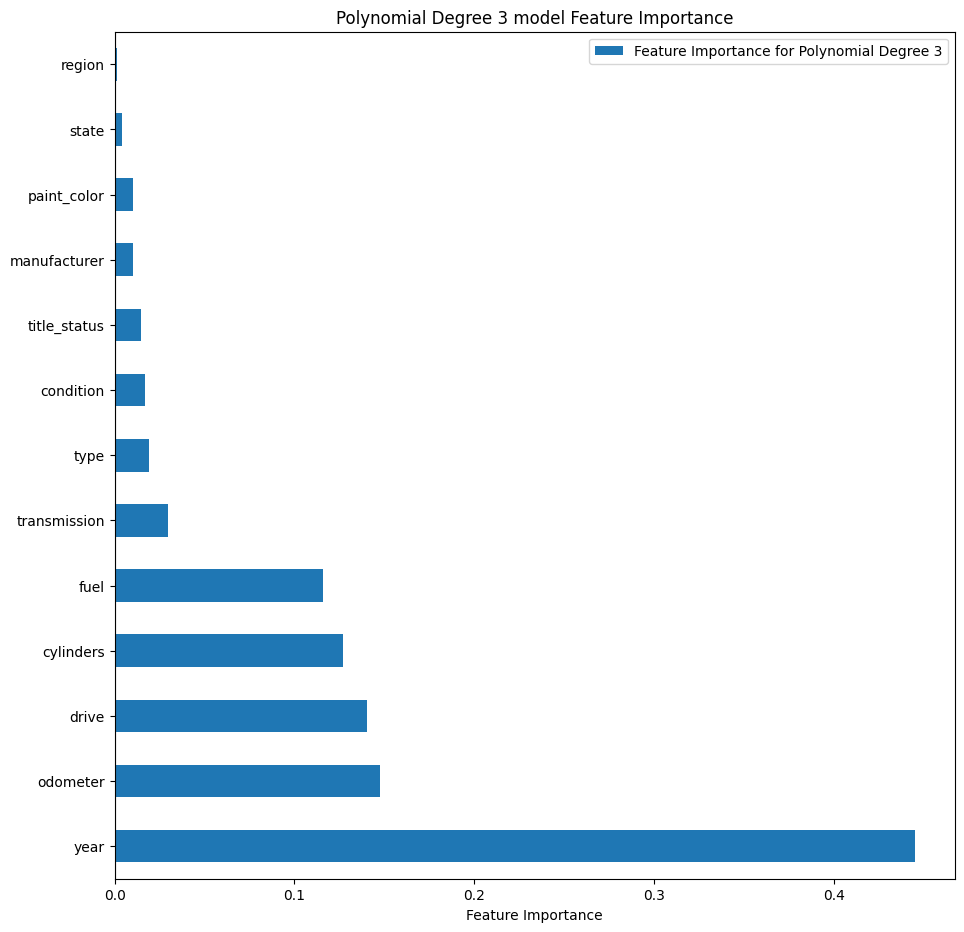

In [78]:
#Plot Feature importance
feature_importance_poly3.plot.barh(figsize=(14, 11))
plt.title("Polynomial Degree 3 model Feature Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Feature Importance")
plt.subplots_adjust(left=0.3)

In [79]:
#Coefficient Importance

feature_names = Poly3[:-1].get_feature_names_out()

coefs_Poly3 = pd.DataFrame(
    Poly3[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs_Poly3.sort_values(by=['Coefficients'], ascending=False)

,Coefficients
year,5883.133375
drive^2,3984.450731
transmission,2998.045468
drive,2126.202764
condition,1197.503869
...,...
odometer transmission,-1229.400914
year transmission,-1263.237729
drive^3,-2080.011342
cylinders^2,-3562.861122


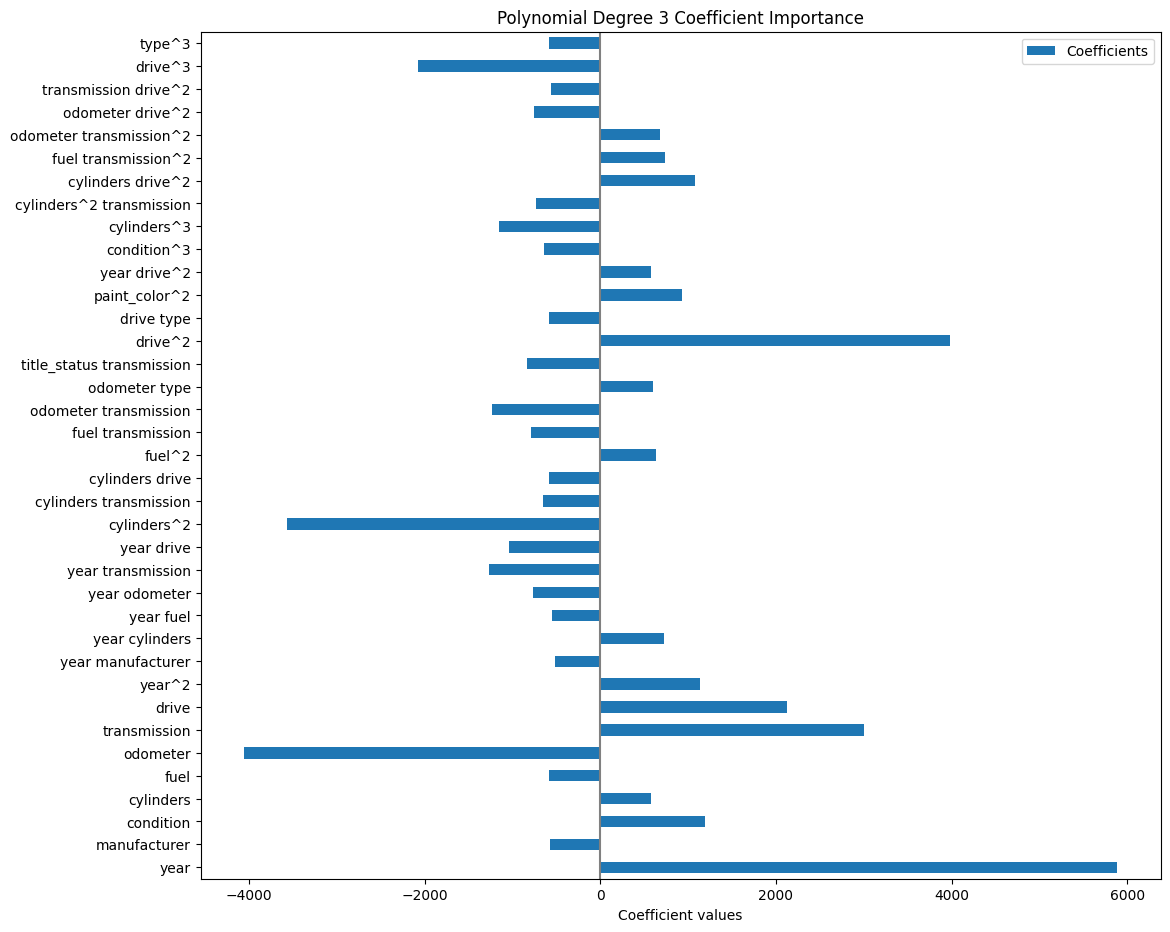

In [80]:
#plot coefficient importance
coefs_Poly3[abs(coefs_Poly3['Coefficients']) >500].plot.barh(figsize=(16, 11))
plt.title("Polynomial Degree 3 Coefficient Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient values")
plt.subplots_adjust(left=0.3)

***Place comments here***

In [81]:
#building a pipeline for the ridge regression
Ridge_Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('ridge', Ridge())])


#Perform ridge regression on the data
Ridge3 = Ridge_Poly3_pipe.fit(X_train, y_train)
train_predict=Ridge3.predict(X_train)
test_predict=Ridge3.predict(X_test)


#Regression Error
Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Ridge3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(Ridge3)


print(f"Ridge Degree 3 Model: train_mse={Ridge3_train_mse}, test_mse={Ridge3_test_mse}")
print(f"Ridge Degree 3 Model: train_mae={Ridge3_train_mae}, test_mae={Ridge3_test_mae}")
print(Ridge3.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ridge', Ridge())])
Ridge Degree 3 Model: train_mse=49966882.87800888, test_mse=50320875.3317961
Ridge Degree 3 Model: train_mae=4895.7240300775775, test_mae=4909.0791571357995
0.6904176843754707


***Place comments here***

###GridSearch Ridge

In [82]:
#Create the alpha parameter dictionary
param_dict = {'ridge__alpha':[1,10,100,1000]}

#GridSearch
Opt_Ridge3 = GridSearchCV(Ridge_Poly3_pipe, param_grid=param_dict)
Opt_Ridge3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_transform',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [1, 10, 100, 1000]})

In [83]:
#Use the Ridge to predict
train_predict=Opt_Ridge3.predict(X_train)
test_predict=Opt_Ridge3.predict(X_test)


#Regression Error
Opt_Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Opt_Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Opt_Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Opt_Ridge3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(f"Opt_Ridge Degree 3 Model: train_mse={Opt_Ridge3_train_mse}, test_mse={Opt_Ridge3_test_mse}")
print(f"Opt_Ridge Degree 3 Model: train_mae={Opt_Ridge3_train_mae}, test_mae={Opt_Ridge3_test_mae}")
print(Opt_Ridge3.score(X_test, y_test))

Opt_Ridge Degree 3 Model: train_mse=49967297.85850727, test_mse=50319180.983095124
Opt_Ridge Degree 3 Model: train_mae=4895.475427277969, test_mae=4908.711414732896
0.6904281082878304


In [84]:
best_alpha = Opt_Ridge3.best_params_
best_alpha

{'ridge__alpha': 100}

In [85]:
Optimal_Ridge_Pipeline =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('ridge', Ridge(alpha = best_alpha['ridge__alpha']))])

Ridge_final = Optimal_Ridge_Pipeline.fit(X_train, y_train)
train_predict=Ridge_final.predict(X_train)
test_predict=Ridge_final.predict(X_test)


#Regression Error
Ridge_Final_train_mse = mean_squared_error(train_predict, y_train)
Ridge_Final_test_mse = mean_squared_error(test_predict, y_test)
Ridge_Final_train_mae = mean_absolute_error(train_predict, y_train)
Ridge_Final_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(f"Opt_Ridge Degree 3 Model: train_mse={Ridge_Final_train_mse}, test_mse={Ridge_Final_test_mse}")
print(f"Opt_Ridge Degree 3 Model: train_mae={Ridge_Final_train_mae}, test_mae={Ridge_Final_test_mae}")
print(Ridge_final.score(X_test, y_test))

Opt_Ridge Degree 3 Model: train_mse=49967297.85850727, test_mse=50319180.983095124
Opt_Ridge Degree 3 Model: train_mae=4895.475427277969, test_mae=4908.711414732896
0.6904281082878304


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [87]:
# Using Premutation importance for selecting features

r = permutation_importance(Optimal_Ridge_Pipeline, X_test, y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2* r.importances_std[i] >0:
        print(f" {X_test.columns[i]:<8}"
              f" {r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

 year     0.444 +/- 0.002
 odometer 0.147 +/- 0.001
 drive    0.140 +/- 0.001
 cylinders 0.127 +/- 0.001
 fuel     0.116 +/- 0.001
 transmission 0.029 +/- 0.001
 type     0.019 +/- 0.000
 condition 0.017 +/- 0.000
 title_status 0.015 +/- 0.000
 manufacturer 0.010 +/- 0.000
 paint_color 0.010 +/- 0.000
 state    0.004 +/- 0.000
 region   0.002 +/- 0.000


In [88]:
coefs_Poly3.sort_values(by='Coefficients', ascending = False).head(10)

,Coefficients
year,5883.133375
drive^2,3984.450731
transmission,2998.045468
drive,2126.202764
condition,1197.503869
year^2,1135.965045
cylinders drive^2,1082.387745
paint_color^2,930.854142
fuel transmission^2,739.891097
year cylinders,730.896730


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

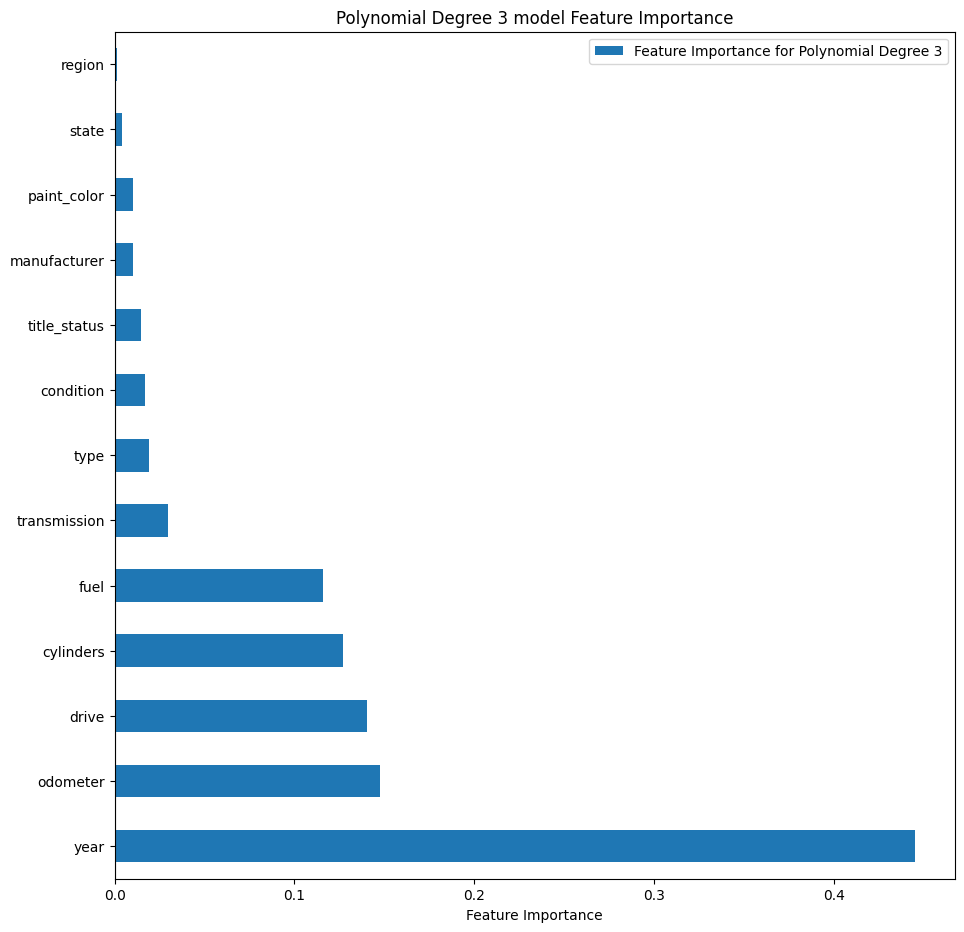

In [89]:
feature_importance_poly3.plot.barh(figsize=(14, 11))
plt.title("Polynomial Degree 3 model Feature Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Feature Importance")
plt.subplots_adjust(left=0.3)